In [2]:
pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [5]:
from datasets import load_dataset

dataset = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations")

In [6]:

texts = [entry['conversation'] for entry in dataset['train']]

print(texts[0])


Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?

Customer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.

Agent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and let me know

In [12]:
from transformers import pipeline

# Load a sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [14]:

   messages = [entry['conversation'] for entry in dataset['train']]


In [16]:
from transformers import pipeline

# Load a sentiment-analysis pipeline with truncation
sentiment_analyzer = pipeline("sentiment-analysis", truncation=True, max_length=512)

# Perform sentiment analysis on the first 10 messages
results = sentiment_analyzer(messages[:10])
for message, result in zip(messages[:10], results):
    print(f"Message: {message}\nSentiment: {result['label']}, Score: {result['score']:.2f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Message: Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?

Customer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.

Agent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and le

In [19]:
# Analyze conversation-level sentiment
conversation_sentiments = []
for index, entry in enumerate(dataset['train']):  # Use enumerate to get index
    # Assuming 'conversation' is a list of dictionaries, each with a 'message' key
    messages = [msg['message'] for msg in entry['conversation'] if isinstance(msg, dict) and 'message' in msg]
    sentiments = sentiment_analyzer(messages)
    conversation_sentiments.append({
        "conversation_id": index,  # Use index as a unique identifier
        "sentiments": sentiments
    })

# Aggregate sentiments for reporting
from collections import Counter
sentiment_counts = Counter([result['label'] for convo in conversation_sentiments for result in convo['sentiments']])
print(sentiment_counts)

Counter()


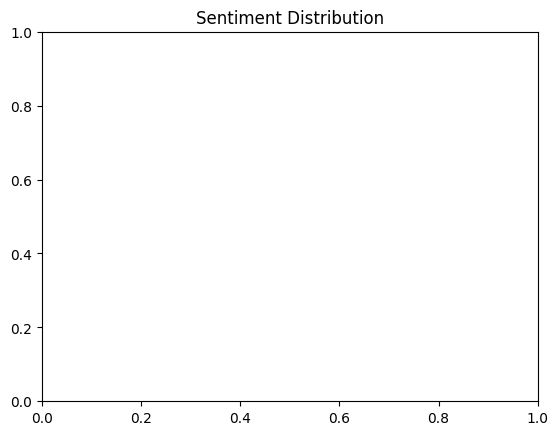

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title("Sentiment Distribution")
plt.show()


In [27]:
from transformers import pipeline

# Load a summarization pipeline
summarizer = pipeline("summarization")

# Summarize customer conversations
# Assuming 'conversation' is a list of strings, join them directly
conversations = [" ".join(convo['conversation']) for convo in dataset['train']]
summaries = [summarizer(convo, max_length=50, min_length=10, truncation=True) for convo in conversations[:5]]

for convo, summary in zip(conversations[:5], summaries):
    print(f"Conversation: {convo[:200]}...\nSummary: {summary[0]['summary_text']}\n")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Conversation: A g e n t :   T h a n k   y o u   f o r   c a l l i n g   B r o w n B o x   C u s t o m e r   S u p p o r t .   M y   n a m e   i s   T o m .   H o w   m a y   I   a s s i s t   y o u   t o d a y ? 
 ...
Summary:  A g e n t :   T h a n k   y o u   f o r   c a l l i n g    B r o w n B o x   C u

Conversation: A g e n t :   T h a n k   y o u   f o r   c a l l i n g   B r o w n B o x   c u s t o m e r   s u p p o r t .   M y   n a m e   i s   A l e x .   H o w   m a y   I   a s s i s t   y o u   t o d a y ? ...
Summary:  A g e n t :   T h a n k   y o u    c u s t o m e r   s u p p p o r t .   A l e x 

Conversation: A g e n t :   T h a n k   y o u   f o r   c a l l i n g   B r o w n B o x   C u s t o m e r   S u p p o r t .   M y   n a m e   i s   S a r a h .   H o w   m a y   I   a s s i s t   y o u   t o d a y ...
Summary:  A g e n t :   T h a n k   y o u   f o r    B r o w n B o x   C u s t o m e r:  

Conversation: C u s t o m e r :   H i ,   I   a m   f a c i n g   a n 

In [26]:
from transformers import pipeline

# Load a zero-shot classification pipeline
emotion_analyzer = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible emotional tones
emotion_labels = ["frustration", "gratitude", "neutral", "anger", "joy"]

# Analyze emotional tone for customer messages
emotions = [emotion_analyzer(msg, candidate_labels=emotion_labels) for msg in messages[:10]]
for msg, emotion in zip(messages[:10], emotions):
    print(f"Message: {msg}\nEmotion: {emotion['labels'][0]} (Score: {emotion['scores'][0]:.2f})\n")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [35]:
from transformers import pipeline

# Load a text generation pipeline
response_generator = pipeline("text-generation", model="gpt2")

# Generate a personalized follow-up
for msg in messages[:5]:
    response = response_generator(f"Generate a follow-up message for this customer query: {msg}", max_length=50)
    print(f"Customer Query: {msg}\nGenerated Follow-Up: {response[0]['generated_text']}\n")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


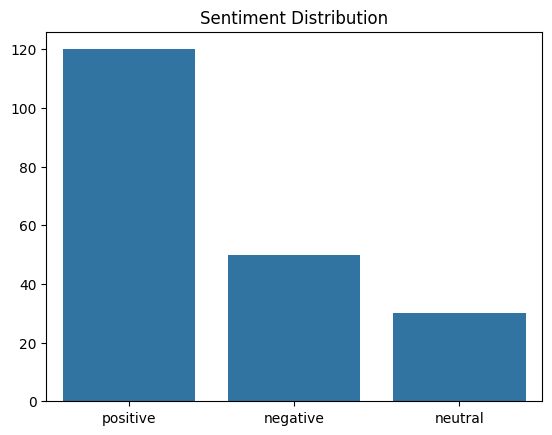

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot sentiment distribution
sentiment_counts = {"positive": 120, "negative": 50, "neutral": 30}  # Example counts
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title("Sentiment Distribution")
plt.show()
